In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from bayes_opt import BayesianOptimization

# 한글
import warnings
warnings.filterwarnings('ignore')
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')


In [4]:
df = pd.read_csv("final.csv", index_col = 0, encoding = "utf-8")

In [5]:
# pd.set_option('display.max_row',100)
# pd.set_option('display.max_column', 100)

In [6]:
df.drop(["시군구", "year_quarter", "addr_road", \
         "transaction_year_month", "transaction_date", \
         "서울_운영_영업_개월_평균", "서울_폐업_영업_개월_평균"], \
        axis = 1, inplace = True)
df["transaction_year"] = df["date"].str.split("-").str[0].astype(int)
df["transaction_month"] = df["date"].str.split("-").str[1].astype(int)
df["transaction_day"] = df["date"].str.split("-").str[2].astype(int)
df.drop("date", axis = 1, inplace = True)

encoder = LabelEncoder()
df["dong_encoded"] = encoder.fit_transform(df["dong"])
df["apt_encoded"] = encoder.fit_transform(df["apt"])
df.drop(["dong", "apt"], axis = 1, inplace = True)

df.rename(columns = {
    "exclusive_use_area": "전용면적",
    "year_of_completion": "건축년도",
    "floor": "층",
    "transaction_real_price": "실거래가",
    "transaction_year": "계약년도",
    "transaction_month": "계약월",
    "transaction_day": "계약일",
    "dong_encoded": "법정동",
    "apt_encoded": "아파트명"
}, inplace = True)
columns = ['소비자태도', '현재생활형편', '미래생활형편', '현재경기판단', '미래경기판단', '내구재구입태도', '주택구입태도', '현재소비지출', '미래소비지출', '순자산', '고용상황', '물가예상']
for column in columns:
    df.rename(columns = {
        column: column + "지수"
    }, inplace = True)
df.rename(columns = {
    "주택매매가격지수": "주택매매가격지수 전국"
}, inplace = True)
df.rename(columns = {
    "아파트실거래가격지수_서울": "아파트실거래가격지수",
    "아파트실거래가격지수_전국": "아파트실거래가격지수 전국",
    "주택매매가격지수_서울_아파트": "주택매매가격지수"
}, inplace = True)
df.rename(columns = {
    "시장금리(콜)": "시장금리"
}, inplace = True)
df.reset_index(inplace = True, drop = True)

In [7]:
df

,전용면적,건축년도,층,실거래가,소비자태도지수,현재생활형편지수,미래생활형편지수,현재경기판단지수,미래경기판단지수,내구재구입태도지수,...,한강 근접 여부,준공 이래 경과년수,초등학교 개수,중학교 개수,고등학교 개수,계약년도,계약월,계약일,법정동,아파트명
0,77.75,1988,5,60000,90.6,81.0,94.9,55.6,80.0,88.0,...,0,27,6,3,4,2015,1,11,8,604
1,77.75,1988,5,65000,90.6,81.0,94.9,55.6,80.0,88.0,...,0,27,6,3,4,2015,3,3,8,604
2,77.75,1988,2,62500,90.6,81.0,94.9,55.6,80.0,88.0,...,0,27,6,3,4,2015,3,7,8,604
3,77.75,1988,6,68000,95.7,86.2,100.4,65.2,83.1,89.3,...,0,27,6,3,4,2015,8,16,8,604
4,79.97,1987,5,73000,90.6,81.0,94.9,55.6,80.0,88.0,...,0,28,6,3,4,2015,1,29,8,605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608042,59.76,1998,13,68000,92.9,76.6,95.2,56.8,86.5,81.9,...,0,23,2,2,1,2021,4,16,273,6805
608043,59.76,1998,15,77000,93.2,79.2,97.1,55.0,81.6,81.6,...,0,23,2,2,1,2021,7,31,273,6805
608044,57.66,2003,5,30500,89.0,72.9,96.0,46.6,86.5,77.6,...,0,18,2,2,1,2021,2,27,273,6881
608045,72.22,2003,4,49500,92.9,76.6,95.2,56.8,86.5,81.9,...,0,18,2,2,1,2021,5,4,273,6882


AttributeError: 'AxesSubplot' object has no property 'fontsize'

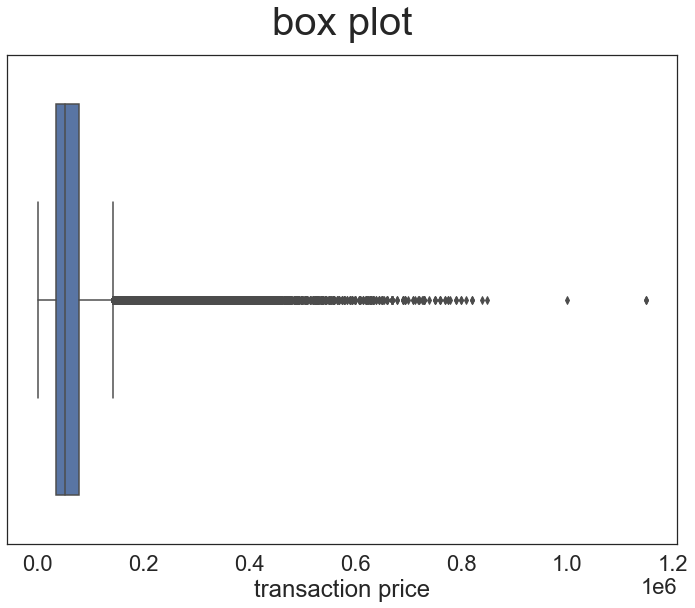

In [36]:
# sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,9))
sns.set(font_scale=2)
sns.set_style("white")


p = sns.boxplot(data=df,
                x="실거래가"
                )
plt.rc('xtick', labelsize=20)
p.set_title("box plot", y=1.03, fontsize=40)
p.set(xlabel='transaction price', fontsize=20)


plt.show()

In [10]:
df["실거래가"].max()

1150000

<Figure size 864x648 with 0 Axes>

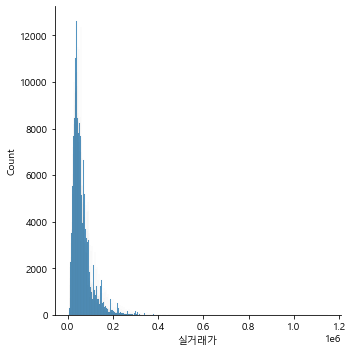

In [28]:
plt.figure(figsize=(12,9))
p = sns.displot(data=df,
                x="실거래가"
                )
plt.show()

### Modelling

In [12]:
# 43 features
# 구 법정동 아파트명 층 전용면적만 입력하면 쉽게 고정되는 변수들
71개 -> rmse 5800
43 rmse 6500

In [39]:
q1 = df['실거래가'].quantile(.25)
q3 = df['실거래가'].quantile(.75)

print('Q1 :', q1)
print('Q3 :', q3)
df_q1 = df[q1<df['실거래가']]
df_q1q3 = df_q1[df_q1['실거래가']<q3]
df_q1q3

Q1 : 36000.0
Q3 : 79000.0


,전용면적,건축년도,층,실거래가,소비자태도지수,현재생활형편지수,미래생활형편지수,현재경기판단지수,미래경기판단지수,내구재구입태도지수,...,한강 근접 여부,준공 이래 경과년수,초등학교 개수,중학교 개수,고등학교 개수,계약년도,계약월,계약일,법정동,아파트명
0,77.75,1988,5,60000,90.6,81.0,94.9,55.6,80.0,88.0,...,0,27,6,3,4,2015,1,11,8,604
1,77.75,1988,5,65000,90.6,81.0,94.9,55.6,80.0,88.0,...,0,27,6,3,4,2015,3,3,8,604
2,77.75,1988,2,62500,90.6,81.0,94.9,55.6,80.0,88.0,...,0,27,6,3,4,2015,3,7,8,604
3,77.75,1988,6,68000,95.7,86.2,100.4,65.2,83.1,89.3,...,0,27,6,3,4,2015,8,16,8,604
4,79.97,1987,5,73000,90.6,81.0,94.9,55.6,80.0,88.0,...,0,28,6,3,4,2015,1,29,8,605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608040,59.76,1998,14,66500,89.0,72.9,96.0,46.6,86.5,77.6,...,0,23,2,2,1,2021,3,18,273,6805
608041,59.76,1998,6,66000,92.9,76.6,95.2,56.8,86.5,81.9,...,0,23,2,2,1,2021,4,10,273,6805
608042,59.76,1998,13,68000,92.9,76.6,95.2,56.8,86.5,81.9,...,0,23,2,2,1,2021,4,16,273,6805
608043,59.76,1998,15,77000,93.2,79.2,97.1,55.0,81.6,81.6,...,0,23,2,2,1,2021,7,31,273,6805


In [40]:
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

In [41]:
X

,전용면적,층,법정동별인구수,총 의사 수,의과 일반의 인원수,의과 인턴 인원수,의과 레지던트 인원수,의과 전문의 인원수,치과 일반의 인원수,치과 인턴 인원수,...,공원 개수,한강 근접 여부,초등학교 개수,중학교 개수,고등학교 개수,계약년도,계약월,계약일,법정동,아파트명
0,77.75,5,84144.0,105.0,4.0,0.0,0.0,50.0,22.0,0.0,...,16,0,6,3,4,2015,1,11,8,604
1,77.75,5,84144.0,105.0,4.0,0.0,0.0,50.0,22.0,0.0,...,16,0,6,3,4,2015,3,3,8,604
2,77.75,2,84144.0,105.0,4.0,0.0,0.0,50.0,22.0,0.0,...,16,0,6,3,4,2015,3,7,8,604
3,77.75,6,84144.0,105.0,4.0,0.0,0.0,50.0,22.0,0.0,...,16,0,6,3,4,2015,8,16,8,604
4,79.97,5,84144.0,105.0,4.0,0.0,0.0,50.0,22.0,0.0,...,16,0,6,3,4,2015,1,29,8,605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608040,59.76,14,46038.0,73.0,1.0,0.0,0.0,36.0,18.0,0.0,...,0,0,2,2,1,2021,3,18,273,6805
608041,59.76,6,45213.0,73.0,1.0,0.0,0.0,36.0,18.0,0.0,...,0,0,2,2,1,2021,4,10,273,6805
608042,59.76,13,45213.0,73.0,1.0,0.0,0.0,36.0,18.0,0.0,...,0,0,2,2,1,2021,4,16,273,6805
608043,59.76,15,45213.0,73.0,1.0,0.0,0.0,36.0,18.0,0.0,...,0,0,2,2,1,2021,7,31,273,6805


In [ ]:
# 25250~89750 (IQR*1.5)

In [29]:
df_25250 = df[25250<df['실거래가']]
df_25250_89750 = df_25250[df_25250['실거래가']<89750]
df_25250_89750

,전용면적,건축년도,층,실거래가,소비자태도지수,현재생활형편지수,미래생활형편지수,현재경기판단지수,미래경기판단지수,내구재구입태도지수,...,한강 근접 여부,준공 이래 경과년수,초등학교 개수,중학교 개수,고등학교 개수,계약년도,계약월,계약일,법정동,아파트명
0,77.75,1988,5,60000,90.6,81.0,94.9,55.6,80.0,88.0,...,0,27,6,3,4,2015,1,11,8,604
1,77.75,1988,5,65000,90.6,81.0,94.9,55.6,80.0,88.0,...,0,27,6,3,4,2015,3,3,8,604
2,77.75,1988,2,62500,90.6,81.0,94.9,55.6,80.0,88.0,...,0,27,6,3,4,2015,3,7,8,604
3,77.75,1988,6,68000,95.7,86.2,100.4,65.2,83.1,89.3,...,0,27,6,3,4,2015,8,16,8,604
4,79.97,1987,5,73000,90.6,81.0,94.9,55.6,80.0,88.0,...,0,28,6,3,4,2015,1,29,8,605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608042,59.76,1998,13,68000,92.9,76.6,95.2,56.8,86.5,81.9,...,0,23,2,2,1,2021,4,16,273,6805
608043,59.76,1998,15,77000,93.2,79.2,97.1,55.0,81.6,81.6,...,0,23,2,2,1,2021,7,31,273,6805
608044,57.66,2003,5,30500,89.0,72.9,96.0,46.6,86.5,77.6,...,0,18,2,2,1,2021,2,27,273,6881
608045,72.22,2003,4,49500,92.9,76.6,95.2,56.8,86.5,81.9,...,0,18,2,2,1,2021,5,4,273,6882


In [54]:
%%time

X = df_q1q3[['전용면적', '건축년도', '층', '소비자태도지수', '현재생활형편지수', '미래생활형편지수',
       '현재경기판단지수', '미래경기판단지수', '내구재구입태도지수', '주택구입태도지수', '현재소비지출지수', '미래소비지출지수',
       '순자산지수', '고용상황지수', '물가예상지수', '코스피지수', '코스닥지수', '코스피200', '코스피50',
       '시장금리', '주택매매가격지수 전국', '주택전세가격지수', '아파트실거래가격지수', '아파트실거래가격지수 전국',
       '생산자물가지수', '소비자물가지수', '주택매매가격지수', '법정동별인구수', '단기 COFIX', '기준금리',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '준공 이래 경과년수', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 20000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.7,
                               nthread = -1,
                               max_depth = 20,
                               )

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 71) (271972,)
Test Data :  (30220, 71) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
2919.296604638025
Wall time: 6min 28s


In [ ]:
# Features 축소 (43)

In [61]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.6,
                               nthread = -1,
                               max_depth = 20,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

0%~100% -> rmse 6000
예측가 +- 6000만원으로 나올 확률 65%
2억 아파트 6000만원차이
20억 아파트 6000만원차이

25%~75% 3억~ 8억 -> rmse 3000
3억 3000만원
8억 3000만원

0%~100% -> rmse 6000
25%~75%
rmse test? -> rmse 3000


Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3146.8162097705913
Wall time: 6min 31s


In [63]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.6,
                               colsample_bytree = 0.6,
                               nthread = -1,
                               max_depth = 20,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3146.8162097705913
Wall time: 7min 31s


In [10]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.62,
                               colsample_bytree = 0.6,
                               nthread = -1,
                               max_depth = 20,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3146.8162097705913
Wall time: 8min 57s


In [11]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.64,
                               colsample_bytree = 0.6,
                               nthread = -1,
                               max_depth = 20,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3146.8162097705913
Wall time: 6min 43s


In [12]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.66,
                               colsample_bytree = 0.6,
                               nthread = -1,
                               max_depth = 20,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3146.8162097705913
Wall time: 8min 18s


In [17]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.68,
                               colsample_bytree = 0.6,
                               nthread = -1,
                               max_depth = 20,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
3146.8162097705913
Wall time: 7min 39s


In [18]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.62,
                               nthread = -1,
                               max_depth = 20,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3155.683525934999
Wall time: 4min 47s


In [19]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.64,
                               nthread = -1,
                               max_depth = 20,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3145.941377982443
Wall time: 4min 30s


In [20]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.66,
                               nthread = -1,
                               max_depth = 20,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3145.941377982443
Wall time: 4min 56s


In [21]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.68,
                               nthread = -1,
                               max_depth = 20,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3150.1170093878045
Wall time: 4min 10s


In [22]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.7,
                               nthread = -1,
                               max_depth = 20,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3164.0460624938437
Wall time: 4min 1s


In [35]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 20,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3145.941377982443
Wall time: 3min 39s


In [36]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 31000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 20,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3145.7542029746173
Wall time: 3min 46s


In [37]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 19,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3143.69949385331
Wall time: 3min 40s


In [38]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 18,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3148.329078427709
Wall time: 3min 39s


In [39]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 17,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3150.2077569270973
Wall time: 3min 36s


In [40]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 16,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3135.1590802037827
Wall time: 3min 38s


In [41]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 15,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3142.8310450691793
Wall time: 3min 35s


In [42]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 14,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3141.3244280385347
Wall time: 3min 36s


In [43]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.2975609635264
Wall time: 3min 38s


In [44]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 21,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3139.097761762112
Wall time: 3min 35s


In [45]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 22)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3139.097761762112
Wall time: 3min 35s


In [46]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 23)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3139.097761762112
Wall time: 3min 35s


In [47]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 12,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3148.8600278690155
Wall time: 4min 26s


In [48]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 11,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3150.47351069279
Wall time: 4min 11s


In [49]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 10,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3147.0752522381154
Wall time: 4min 6s


In [50]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 9)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3152.601624158538
Wall time: 4min 36s


In [51]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 8)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3146.933168875334
Wall time: 4min 12s


In [52]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 0.95,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.2975609635264
Wall time: 3min 48s


In [53]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 0.90,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.2975609635264
Wall time: 3min 41s


In [54]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 0.85,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.2975609635264
Wall time: 3min 43s


In [55]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 0.80,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.2975609635264
Wall time: 3min 46s


In [56]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 0.75,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.2975609635264
Wall time: 4min 31s


In [57]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 0.70,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.2975609635264
Wall time: 4min 28s


In [59]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1.1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
3131.2975609635264
Wall time: 4min 21s


In [60]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1.2,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.2975609635264
Wall time: 4min 13s


In [61]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1.3,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.2975609635264
Wall time: 4min 51s


In [62]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 2,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.2975609635264
Wall time: 4min 8s


In [63]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 3,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.2975609635264
Wall time: 4min 15s


In [64]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 4,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.2975609635264
Wall time: 4min 38s


In [65]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 10,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.2975609635264
Wall time: 4min 2s


In [122]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 40,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3176.054414491894
Wall time: 5min 21s


In [123]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 25,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3153.221769358603
Wall time: 4min 53s


In [66]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 100,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3205.775135413545
Wall time: 4min 1s


In [67]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 1000,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3333.1148095951025
Wall time: 5min 13s


In [68]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 7,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.2975609635264
Wall time: 3min 50s


In [69]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 15,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.2975609635264
Wall time: 3min 45s


In [70]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 20,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.2975609635264
Wall time: 4min 10s


In [71]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 25,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3153.221769358603
Wall time: 4min 4s


In [72]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 30,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3169.914109465999
Wall time: 4min 19s


In [73]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 35,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3157.1771721376454
Wall time: 4min 14s


In [74]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 0.01,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.2975609635264
Wall time: 4min 3s


In [90]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 30000,
                               learning_rate = 0.1,
                               min_child_weight = 0.001,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
3131.2975609635264
Wall time: 4min 5s


In [91]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 29000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.2312069091076
Wall time: 3min 47s


In [92]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 31000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.579870341299
Wall time: 4min 16s


In [93]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 28000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3130.922429132927
Wall time: 4min 16s


In [94]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 27000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.3135931510897
Wall time: 3min 33s


In [95]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 26000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.5753894497225
Wall time: 3min 24s


In [96]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 25000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3132.0261610531684
Wall time: 3min 12s


In [97]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 24000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3133.334579714605
Wall time: 3min 42s


In [98]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 23000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3133.6601955748756
Wall time: 4min 31s


In [99]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 22000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3133.916343782517
Wall time: 4min 26s


In [100]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 21000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3133.984508808689
Wall time: 3min 57s


In [101]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 20000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3136.035578414145
Wall time: 3min 27s


In [102]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 19000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3138.2358909663185
Wall time: 3min 21s


In [103]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 18000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3140.821830866309
Wall time: 3min 3s


In [104]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 32000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3132.2472603029014
Wall time: 6min 50s


In [105]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 33000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3132.836450308141
Wall time: 7min 28s


In [106]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 34000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3133.324177286812
Wall time: 7min 8s


In [108]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 28500,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.1921645263265
Wall time: 11min 2s


In [110]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 27500,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.055551121577
Wall time: 10min 15s


In [111]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 27800,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3130.9658921949867
Wall time: 9min 16s


In [112]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 27900,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3130.9458749623022
Wall time: 3min 42s


In [113]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 28100,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.1046235987724
Wall time: 3min 32s


In [114]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 28200,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (271972, 43) (271972,)
Test Data :  (30220, 43) (30220,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3131.1073833035994
Wall time: 3min 34s


In [116]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 28000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (241753, 43) (241753,)
Test Data :  (60439, 43) (60439,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3194.043307126354
Wall time: 4min 2s


In [117]:
%%time
X = df_q1q3[['전용면적', '층', '법정동별인구수',
       '총 의사 수', '의과 일반의 인원수', '의과 인턴 인원수', '의과 레지던트 인원수', '의과 전문의 인원수',
       '치과 일반의 인원수', '치과 인턴 인원수', '치과 레지던트 인원수', '치과 전문의 인원수', '한방 일반의 인원수',
       '한방 인턴 인원수', '한방 레지던트 인원수', '한방전문의 인원수', '병원 개수', '보건소 개수', '보건지소 개수',
       '상급종합병원 개수', '요양병원 개수', '의원 개수', '정신병원 개수', '산부인과 개수', '종합병원 개수',
       '치과병원 개수', '치과의원 개수', '한방병원 개수', '한의원 개수', '약국 개수', '역 개수', '공원 면적',
       '대공원 개수', '공원 개수', '한강 근접 여부', '초등학교 개수', '중학교 개수',
       '고등학교 개수', '계약년도', '계약월', '계약일', '법정동', '아파트명']]

#######standardization#######
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#####################n#######

y = df_q1q3['실거래가']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Model_apt_lgbm = LGBMRegressor(n_estimators = 26000,
                               learning_rate = 0.1,
                               min_child_weight = 1,
                               subsample = 0.7,
                               colsample_bytree = 0.65,
                               nthread = -1,
                               max_depth = 13,)

Model_apt_lgbm.fit(X_train, y_train)
y_hat = Model_apt_lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

Train Data :  (241753, 43) (241753,)
Test Data :  (60439, 43) (60439,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
3194.084331755328
Wall time: 3min 47s
